In [1]:
using Pkg; Pkg.activate("."); 
using Revise
import MUST
using PyPlot
using DelimitedFiles

MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2" ;
#MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" ;

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/dispatch2multi/Project.toml`


In [2]:
input_name  = "TSO_sun_Magg_rturc"
output_name = "TSO_sun_Magg"
eos_name    = "TSO_sun_Magg_v1"


input_name  = "TAB_sun_profile_hRes"
output_name = "TAB_sun_hRes"
eos_name    = "solar_lte";


input_name  = "TSO_sun_Magg_moreRT"
output_name = "TSO_sun_Magg_average"
eos_name    = "TSO_sun_Magg_v1";


## Fist TSO EoS after fixing the molec. bug at 20kK
input_name  = "TSO_sun_TDZv3.1_v2"
output_name = "TSO_sun_TDZv3.1_v2"
eos_name    = "TSO_sun_Magg_v3.1";

input_name  = "TSO_sun_TDZv3.1_int"
output_name = "TSO_sun_TDZv3.1_cool"
eos_name    = "TSO_sun_Magg_v3.1";

## MARCS opacity models
input_name  = "DIS_MARCS_v0.1.1_TDZ3"
output_name = "DIS_MARCS_v0.1.1_TDZ3"
eos_name    = "DIS_MARCS_v0.1.1";

In [3]:
path  = abspath.("../stagger2bifrost/stagger_av.dat")
#path  = "staggertest.dat"
model = reverse(readdlm(path, skipstart=2), dims=1)
z_goal, T_goal, d_goal = model[:, 1], model[:, 2], exp.(model[:, 3]);

In [4]:
model_box = MUST.Boxes(MUST.@in_dispatch("data/$(input_name)"))
m = model_box[1][end-1];

In [5]:
## compute the average between the latest boxes
box_av = MUST.time_statistic(MUST.mean, model_box[1][end-11:end-1]);

In [6]:
m = box_av;

In [7]:
eos = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/$(eos_name)"));

In [8]:
MUST.multiBox(m, eos, output_name, downsample_xy=8)

In [9]:
b_d = MUST.multiBox(output_name);
@show size(b_d);

size(b_d) = (20, 20, 80)


In [10]:
b_m = MUST.multiBox("/u/peitner/MULTI3D/Multi3D/input_multi3d/atmos/t5777g44m0005_20.5x5x230");

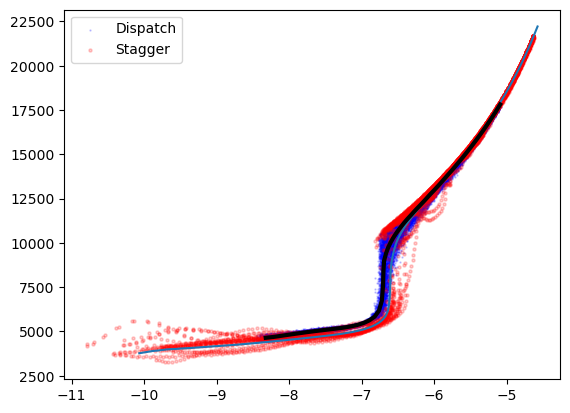

In [11]:
close()
t = MUST.plane_statistic(MUST.mean, b_d, :T)
d = MUST.plane_statistic(MUST.mean, b_d, :d)

t_m = MUST.plane_statistic(MUST.mean, b_m, :T)
d_m = MUST.plane_statistic(MUST.mean, b_m, :d)

plt.scatter(log10.(b_d[:d]), b_d[:T], s=0.5, alpha=0.2, label="Dispatch", color="blue")
plt.scatter(log10.(b_m[:d]), b_m[:T], s=5.0, alpha=0.2, label="Stagger", color="red")

plt.plot(log10.(d_goal), T_goal)

plt.plot(log10.(d), t, color="k", lw=3)
plt.plot(log10.(d_m), t_m, color="0.5", lw=3)

#plt.xlim(log(10, 1.e-7), log(10, 1e-6))
#plt.ylim(8000,14000)
plt.legend()

gcf()

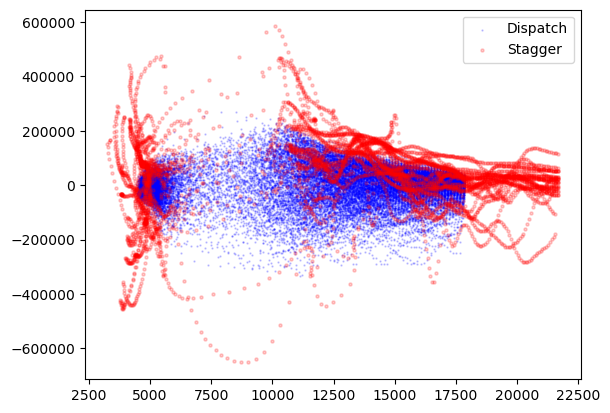

In [12]:
close()

plt.scatter(b_d[:T], b_d[:uz], s=0.5, alpha=0.2, color="blue", label="Dispatch")
plt.scatter(b_m[:T], b_m[:uz], s=5.0, alpha=0.2, color="red", label="Stagger")

plt.legend();

gcf()

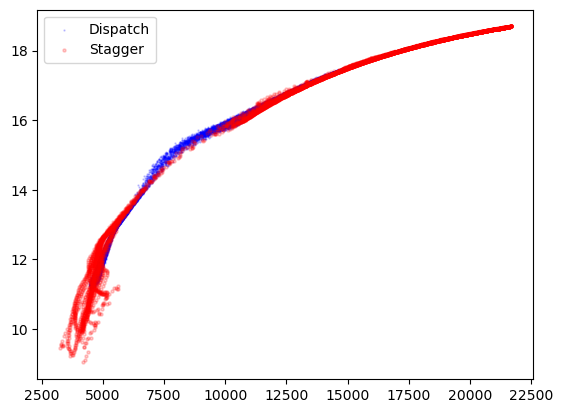

In [13]:
close()

plt.scatter(b_d[:T], log10.(b_d[:Ne]), s=0.5, alpha=0.2, color="blue", label="Dispatch")
plt.scatter(b_m[:T], log10.(b_m[:Ne]), s=5.0, alpha=0.2, color="red", label="Stagger")

plt.legend();

gcf()

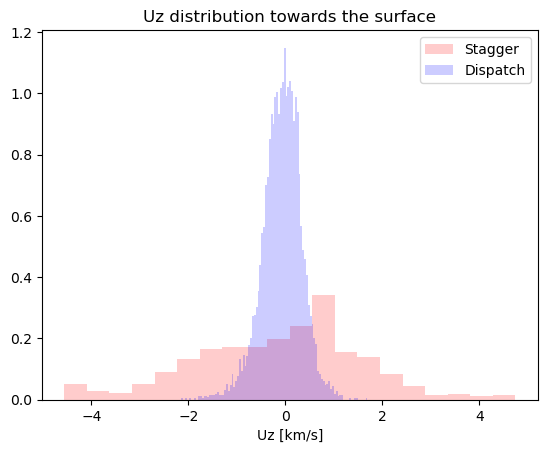

In [14]:
mask_m = b_m[:T] .< 6000.0
mask_d = b_d[:T] .< 6000.0

u_m  = b_m[:uz][mask_m] ./ 1e5
u_d  = b_d[:uz][mask_d] ./ 1e5

close()
plt.hist(reshape(u_m, :), bins=20, alpha=0.2, color="red", density=true, label="Stagger")
plt.hist(reshape(u_d, :), bins=100, alpha=0.2, color="blue", density=true, label="Dispatch")

plt.title("Uz distribution towards the surface")
plt.xlabel("Uz [km/s]")

plt.legend();
gcf()

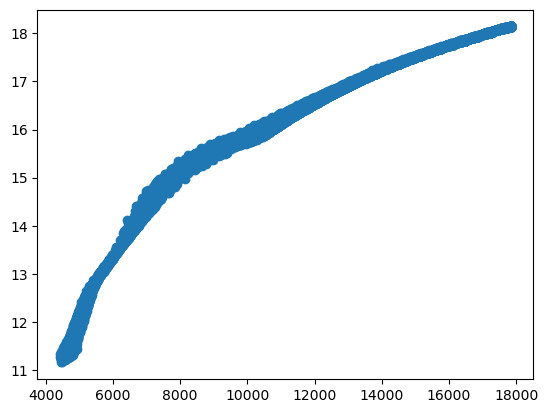

In [15]:
close()
plt.scatter(b_d[:T], log.(10, b_d[:Ne]))
gcf()